### TODO list for this code:
3. Check how high fps I can have in the manim animation without the program crashing. fps=10 works
4. Check if I should use max(Umaxmax,Vmaxmax) for the colors in the manim animation.
5. Try to change the parameters for all the different reaction models.
6. Ska vi använda en random seed för att kunna köra samma plot flera gånger??
7. Do Amanda want to put a save variable in the settings?
8. Are there some parameters or values in figure_functions that could be put in parameter_file
9. Make it so I can choose what color I want to use for each morphogen in the animation in the parameter file.




### Comments:
1. Jag tror att våra plots borde bli likadana eftersom båda använder rgb.
2. Borde inte Amandas main code börja sin for loop med t[1::]. Alltså skippa då tiden är noll. Och då också plota då tiden är noll innan for-loopen.
3. Borde jag lägga in currentTime = 1 i main programmet så att jag kan köra main-programmet utan att behöva köra settings-programmet igen?

### Grammar rules for this project
1. Files are named with snake case. Example: example_file
2. variables are named with camel case. With exception for U and V. Example: exampleVariable
3. Functions are named with pascal case. Example: ExampleFunction()
4. If you return more than one variable, use "return X, Y" and not "return [X,Y]". Don't know if it matters though.
5. 


### Importing numpy, matplotlib, manim, and more

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imp
import math
#import cv2
from time import process_time

import figure_functions
import pattern_functions
#from parameter_functions import ParameterClass
import parameter_functions
imp.reload(pattern_functions)
imp.reload(figure_functions)
imp.reload(parameter_functions)

<module 'parameter_functions' from 'C:\\Users\\Admin\\Documents\\Jupyter notes folder\\parameter_functions.py'>

## Settings

In [49]:
import pattern_functions
imp.reload(pattern_functions)
import parameter_functions
imp.reload(parameter_functions)


#All parameters except "saveForAnimation" are depentent on what input you put in parameter_functions.ParameterClass()
par = parameter_functions.ParameterClass("GrayScott1")

# If you want to animate the pattern or not
saveForAnimation = True





# Creating the cells and the initial values of U and V
rows = par.rows; columns = par.columns; initialModel = par.initialModel
U,V = pattern_functions.InitialConditions(rows,columns, initialModel)


#Reaction model and its constants
reactionDiffusionModel = par.reactionDiffusionModel
reactionDiffusionConstants = par.reactionDiffusionConstants 


# time settings
dt = par.dt           # time step size
tmax = par.tmax           # end time #TODO: equilibrium is reached after 75 sec
steps = par.steps # number of time steps 
time = par.time  # array of time steps


# constant and lists concerning the time limit when the pattern no longer change form
i = 0
MSElist = []        # list of mean square errors at different times
timeList = []       # corresponding list to MSElist to show at which time the MSE is taken
trueTime = par.trueTime    # set to True if pattern should evolve until t = tmax

# lists and constants concerning the image produced of the pattern
#imgList = np.empty((12, rows, columns, 3), dtype=np.uint8)
imgList = []


if (saveForAnimation):
    fps= par.fps #Frames per second.
    sped_up = par.sped_up #How much the animation is sped up in comparison to real time.
    numberOfFrames = 1 + math.floor(tmax * fps /sped_up)
    animationTimes = np.linspace(0,tmax,numberOfFrames) # a vector with all the t values I want to animate.
    currentFrame = 0
    UV = np.zeros([numberOfFrames,rows,columns]) #An array that will be filled with U for all steps of time
    UV[currentFrame,:,:] = U #Putting in the initial values of U in UV
    VV = np.zeros([numberOfFrames,rows,columns]) #An array that will be filled with V for all steps of time
    VV[currentFrame,:,:] = V #Putting in the initial values of V in VV
    currentFrame = 1
    
    

#Shows you some data about your parameters
print("The matrix consists of ", rows, " rows and ", columns, " columns.")
print("You are using the initial model: ", initialModel)
print()
print("Reaction diffusion model: ", reactionDiffusionModel, " with constants: ", reactionDiffusionConstants)
print()
print("Time step: ", dt, ". Max time: ", tmax, ". Number of time steps: ", steps)
print()
if (saveForAnimation):
    print("Your animation will be ", numberOfFrames/fps, " seconds long")
    print("number of frames in your animation: ", numberOfFrames)
    print("The time to render the animation is estimated to be " ,numberOfFrames/8 * rows/50 * columns/50, " minutes")

The matrix consists of  50  rows and  50  columns.
You are using the initial model:  InitializeGrayScott

Reaction diffusion model:  GrayScott  with constants:  1

Time step:  1 . Max time:  600 . Number of time steps:  600

Your animation will be  24.1  seconds long
number of frames in your animation:  241
The time to render the animation is estimated to be  30.125  minutes


In [ ]:
# Show initial state
figure_functions.numpy2pil(U, V, rows, columns)

TypeError: _stack_dispatcher() got an unexpected keyword argument 'dtype'

## The main program for simulating the turing patterns 

In [52]:
import figure_functions
imp.reload(figure_functions)
import pattern_functions
imp.reload(pattern_functions)


# The time evolution of the pattern formation

# timeLim switches to False when pattern has reached equilibrium and stops the loop
timeLim = True

for t in time:
    if timeLim is False:
        break
    i += 1

    deltaU, deltaV = pattern_functions.ReactionDiffusionFunction(U,V,reactionDiffusionModel,reactionDiffusionConstants)

    # Updates to the next time step using the current timestep
    Unext = U + dt*deltaU
    Vnext = V + dt*deltaV

    if trueTime is False:       
        if t > 10 and i % 10**3 == 0:
            timeLim, m = pattern_functions.MSE(U, Unext)
            MSElist.append(m)
        
    if i % 10**4 == 0: #10**4
        print(i/steps)
        timeList.append(math.ceil(t))
        imgList.append(figure_functions.numpy2pil(U, V, rows, columns, result=True))
        
    if (saveForAnimation):
        #Here I save the current U and V. But only if it is a time frame that I want to use in the animation.
        if (t >= animationTimes[currentFrame]):
            UV[currentFrame,:,:] = U #Filling up UV with U for all the time steps
            VV[currentFrame,:,:] = V #Filling up VV with V for all the time steps
            #timeToAnimate += sped_up/fps #Calculates the next time step to animate.
            currentFrame +=1
            

    U = Unext
    V = Vnext

### Isaks plot (is still here because he can't import cv2) 

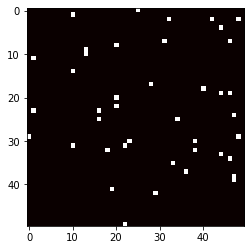

t:  67.1118530884808
plot nr:  1


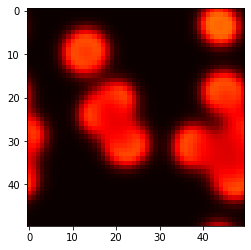

t:  134.2237061769616
plot nr:  2


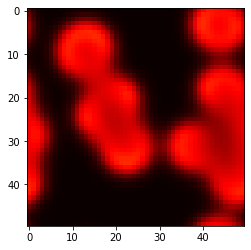

t:  200.3338898163606
plot nr:  3


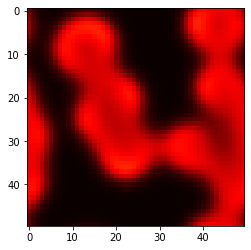

t:  267.4457429048414
plot nr:  4


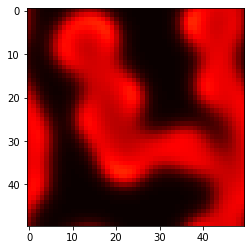

t:  333.5559265442404
plot nr:  5


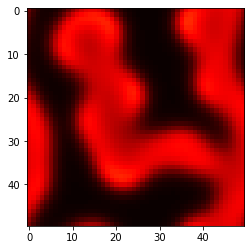

t:  400.6677796327212
plot nr:  6


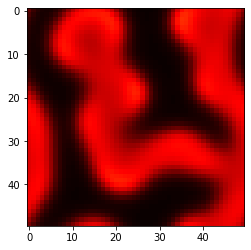

t:  466.7779632721202
plot nr:  7


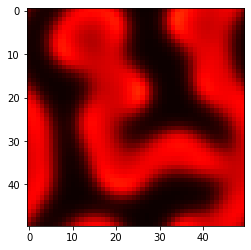

t:  533.889816360601
plot nr:  8


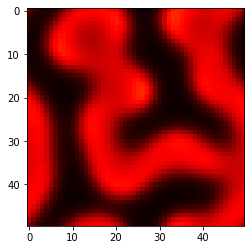

t:  600.0
plot nr:  9


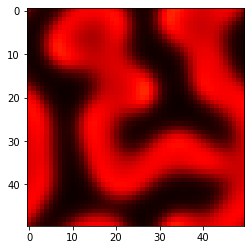

This is what the maximum of U was:  1.055
This is what the maximum of V was:  1.483


In [44]:
import figure_functions
import pattern_functions
imp.reload(pattern_functions)
imp.reload(figure_functions)



NOP = 10 #number of plots
plotTime = np.linspace(0,tmax,NOP)
currentPlot = 0
#print("WTSP: ", WTSP)


#vm is the value that will show the maximum brightness in the plot. I usually pick vm to be just a bit over Umaxmax.
#For Schnakenberg
#vm=5 # When mean_centre = 1 , standard_deviation = 0.1 then Umaxmax = 4.944
#For angelfishPomacanthus
#vm = 2.917
#For AlanTuring()
#vm = 3
#For GrayScott()
vm = 1.0


plt.imshow(V, cmap='hot', interpolation='nearest', vmin=0, vmax=vm)
plt.show()
currentPlot = 1


#Umaxmax and Vmaxmax will be used to check what the maximal concentration of U and V was for all values of t
Umaxmax = U.max()
Vmaxmax = V.max()


for t in time[1::]: #Moving forward in time each time this loops.
    [deltaU,deltaV] = pattern_functions.ReactionDiffusionFunction(U,V,reactionDiffusionModel,reactionDiffusionConstants)
    
    UNext = U + dt*deltaU #U one time step forward in time
    VNext = V + dt*deltaV #V one time step forward in time
    U = UNext #I do this for the next iteration in the loop 
    V = VNext #I do this for the next iteration in the loop
    if (saveForAnimation):
        #Here I save the current U and V. But only if it is a time frame that I want to use in the animation.
        if (t >= animationTimes[currentFrame]):
            UV[currentFrame,:,:] = U #Filling up UV with U for all the time steps
            VV[currentFrame,:,:] = V #Filling up VV with V for all the time steps
            timeToAnimate += sped_up/fps #Calculates the next time step to animate.
            currentFrame +=1
    
    # Checking if the we have a new concentration maximum of U and V
    if (U.max()>Umaxmax):
        Umaxmax = U.max()
        #print("nytt U.max(): ", U.max())
    if (V.max()>Vmaxmax):
        Vmaxmax = V.max()
    
    # Makes it so I dont plot/print for every time step but will instead plot/print something NOSP number of times total.
    if (t >= plotTime[currentPlot]):
        print("t: ",t)
        print("plot nr: ", currentPlot)
        #print("U.max(): ", U.max())
        #print("Maximala U för denna tid: ", U.max())
        #print("U")
        #print(U)
        #print("V")
        #print(V)
        #print("sum of V: ", np.sum(V))
        plt.imshow(V, cmap='hot', interpolation='nearest', vmin=0, vmax=vm)
        plt.show()
        #plt.imshow(U, cmap='hot', interpolation='nearest')
        currentPlot += 1
        
print("This is what the maximum of U was: ", Umaxmax)
print("This is what the maximum of V was: ", Vmaxmax)


### The Schnakenberg model of reaction

$$
\left. \begin{aligned}
& f(U,V) = c_1 - c_{-1}U + c_3 U^2 V \\
& g(U,V) = c_4 U^2 - c_5 V
\end{aligned} \right\}
$$

### The  Gierer –Meinhardt model of reaction

$$
\left. \begin{aligned}
& f(U,V) = c_1 - c_2 U + c_3 \frac{U^2}{(1+kU^2)V} \\
& g(U,V) = c_4 U^2 - c_5 V
\end{aligned} \right\}
$$

#### The reaction model angelfishPomacanthus(U,V) is taken from the article: A reaction–diffusion wave on the skin of the marine angelfish Pomacanthus. https://www.nature.com/articles/376765a0

$$
\left. \begin{aligned}
& f(U,V) = c_1 U + c_2 V + c_3 -g_A U \\
& g(U,V) = c_4 U + c_5 - g_V V 
\end{aligned} \right\}
$$

### Gray-Scott model:
https://mrob.com/pub/comp/xmorphia/

$$ \begin{split} & \frac{\partial u}{\partial t} = D_u \nabla^2 u - uv^2 + F(1-u),\\
& \frac{\partial v}{\partial t} = D_v \nabla^2 v + uv^2 - (F+k)v
\end{split} $$


### Alan Turings model (equation 6.2 in the article) 

$$ \left. \begin{split} & \frac{dx}{dt} = ax_r + by_r + \mu (x_{r+1} - 2x_r + x_{r-1}), \\
 & \frac{dy}{dt} = cy_r + dy_r + \nu (y_{r+1} - 2y_r + y_{r-1})
\end{split} \right\}
$$

## Animating the pattern with manim

In [87]:
from manim import *
config.max_files_cached = 300

Manim Community v0.16.0.post0

In [46]:
%%manim -qm AnimateTuringPattern
#Manims positioning uses a 3D coordinate system. Uses numpy arrays. np.array([2,1,0]) is a position on the window.
#Manims default window is 8 Munits(manim units) tall and 14 + 2/9 = 14.22222.. Munits in width.
#The origo is at the center of the window

class AnimateTuringPattern(Scene):
    def construct(self):
        # It seems like all the variables from the other codes are global so I can use U and other variables in this function without having to import them.
        graph_sl = 7.5 #The graphs side length
        square_sl = graph_sl/rows #The side length of each cell
        squares = VGroup() #Makes an empty "array" that I can put my square manim objects in.
        
       
        
        for t in range(0,numberOfFrames): #Goes through time
            for i in range(0,rows): #Goes through each row
                for j in range(0,columns): # Goes through each column
                    #Goes from the value of U,V in the current cell in the current time step, to rgb color values, to hex color code.
                    color_red = int(255*UV[t,i,j]/Umaxmax) #Calculates the red value in rgb. 255 for Umaxmax
                    color_green = int(255*VV[t,i,j]/Vmaxmax) #Calculates the green value in rgb. 255 for Vmaxmax
                    color_blue = 0 #Does not use blue currently in the animation.
                    hex_color = '#%02x%02x%02x' % (color_red, color_green, color_blue) #Makes the rgb values into hex color code because manim uses hex color code.
                        
                    #When t=0 I create one square for each cell, fill it with the right color, move it to the right place in the scene, 
                    # and then I add it to the scene.
                    if (t==0): 
                        squares.add(Square(side_length = square_sl, color = hex_color, fill_opacity = 1).move_to([-graph_sl/2+square_sl*(0.5+j),graph_sl/2-square_sl*(0.5+i),0]))
                        self.add(squares[rows*i+j])
                            
                    #Every other time I just change the color of the cell/square to match the current U and V concentration 
                    else:
                        squares[rows*i+j].set_color(hex_color)
                    # After I have gone through each cell for the current time step I make the animation wait 1/fps seconds because I want fps frames per second.
                    #and I calculate the next time I want to animate, which depends on sped_up and fps.
            #time_text = Text("time: " + str(round(t*tSS,3))
            #time_text.move_to([graph_sl/2 +1,- graph_sl/2 +1, 0])
            #time_text.move_to([6,0,0])
            #self.add(time_text)
            self.wait(1/fps)
        

[03/20/24 18:20:01] INFO     Animation 0 : Partial movie file written in                   ]8;id=540497;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=783729;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\134215                         
                             9004_1413622352_1726613048.mp4'                                                       

[03/20/24 18:20:08] INFO     Animation 1 : Partial movie file written in                   ]8;id=99016;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=308742;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2547415783.mp4'                                                       

[03/20/24 18:20:15] INFO     Animation 2 : Partial movie file written in                   ]8;id=716001;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=976279;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1319648320.mp4'                                                       

[03/20/24 18:20:22] INFO     Animation 3 : Partial movie file written in                   ]8;id=45984;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=799032;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2385610993.mp4'                                                       

[03/20/24 18:20:30] INFO     Animation 4 : Partial movie file written in                   ]8;id=401703;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=836649;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1616937139.mp4'                                                       

[03/20/24 18:20:37] INFO     Animation 5 : Partial movie file written in                   ]8;id=364082;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=631958;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3010208111.mp4'                                                       

[03/20/24 18:20:46] INFO     Animation 6 : Partial movie file written in                   ]8;id=628217;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=556813;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2475534018.mp4'                                                       

[03/20/24 18:20:53] INFO     Animation 7 : Partial movie file written in                   ]8;id=671332;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=278501;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2318805660.mp4'                                                       

[03/20/24 18:21:01] INFO     Animation 8 : Partial movie file written in                   ]8;id=753941;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=546079;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3964302306.mp4'                                                       

[03/20/24 18:21:09] INFO     Animation 9 : Partial movie file written in                   ]8;id=401839;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=29220;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1054933606.mp4'                                                       

[03/20/24 18:21:16] INFO     Animation 10 : Partial movie file written in                  ]8;id=884229;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=682396;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1655300541.mp4'                                                       

[03/20/24 18:21:23] INFO     Animation 11 : Partial movie file written in                  ]8;id=539057;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=590240;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_369295253.mp4'                                                        

[03/20/24 18:21:30] INFO     Animation 12 : Partial movie file written in                  ]8;id=577561;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=195111;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3224435039.mp4'                                                       

[03/20/24 18:21:38] INFO     Animation 13 : Partial movie file written in                  ]8;id=180837;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=713582;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3423278543.mp4'                                                       

[03/20/24 18:21:45] INFO     Animation 14 : Partial movie file written in                  ]8;id=787580;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=680624;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1922851012.mp4'                                                       

[03/20/24 18:21:52] INFO     Animation 15 : Partial movie file written in                  ]8;id=540891;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=273791;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_535218400.mp4'                                                        

[03/20/24 18:22:00] INFO     Animation 16 : Partial movie file written in                  ]8;id=129388;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=885287;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2818274540.mp4'                                                       

[03/20/24 18:22:07] INFO     Animation 17 : Partial movie file written in                  ]8;id=235258;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=443517;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2192508518.mp4'                                                       

[03/20/24 18:22:14] INFO     Animation 18 : Partial movie file written in                  ]8;id=422343;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=900918;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1920644044.mp4'                                                       

[03/20/24 18:22:21] INFO     Animation 19 : Partial movie file written in                  ]8;id=389735;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=691683;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3762979062.mp4'                                                       

[03/20/24 18:22:30] INFO     Animation 20 : Partial movie file written in                  ]8;id=798803;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=323170;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1618428789.mp4'                                                       

[03/20/24 18:22:39] INFO     Animation 21 : Partial movie file written in                  ]8;id=517037;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=140500;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3590330610.mp4'                                                       

[03/20/24 18:22:46] INFO     Animation 22 : Partial movie file written in                  ]8;id=364945;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=153253;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1352545157.mp4'                                                       

[03/20/24 18:22:53] INFO     Animation 23 : Partial movie file written in                  ]8;id=236448;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=472959;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1712517808.mp4'                                                       

[03/20/24 18:23:01] INFO     Animation 24 : Partial movie file written in                  ]8;id=198348;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=398302;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2788068255.mp4'                                                       

[03/20/24 18:23:08] INFO     Animation 25 : Partial movie file written in                  ]8;id=223335;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=910496;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3923119239.mp4'                                                       

[03/20/24 18:23:15] INFO     Animation 26 : Partial movie file written in                  ]8;id=640567;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=970688;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_712491484.mp4'                                                        

[03/20/24 18:23:23] INFO     Animation 27 : Partial movie file written in                  ]8;id=206399;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=585724;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_57665601.mp4'                                                         

[03/20/24 18:23:30] INFO     Animation 28 : Partial movie file written in                  ]8;id=445656;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=67427;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_796451364.mp4'                                                        

[03/20/24 18:23:37] INFO     Animation 29 : Partial movie file written in                  ]8;id=312536;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=110976;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1116615281.mp4'                                                       

[03/20/24 18:23:46] INFO     Animation 30 : Partial movie file written in                  ]8;id=542219;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=941454;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_438648760.mp4'                                                        

[03/20/24 18:23:53] INFO     Animation 31 : Partial movie file written in                  ]8;id=960822;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=428779;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_847205721.mp4'                                                        

[03/20/24 18:24:01] INFO     Animation 32 : Partial movie file written in                  ]8;id=924352;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=329345;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4021564611.mp4'                                                       

[03/20/24 18:24:08] INFO     Animation 33 : Partial movie file written in                  ]8;id=116434;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=65629;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_768668810.mp4'                                                        

[03/20/24 18:24:15] INFO     Animation 34 : Partial movie file written in                  ]8;id=855769;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=232320;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2687944253.mp4'                                                       

[03/20/24 18:24:23] INFO     Animation 35 : Partial movie file written in                  ]8;id=521264;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=286595;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4214916740.mp4'                                                       

[03/20/24 18:24:30] INFO     Animation 36 : Partial movie file written in                  ]8;id=614617;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=819528;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_916414911.mp4'                                                        

[03/20/24 18:24:38] INFO     Animation 37 : Partial movie file written in                  ]8;id=154921;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=121556;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_7560710.mp4'                                                          

[03/20/24 18:24:45] INFO     Animation 38 : Partial movie file written in                  ]8;id=273272;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=979163;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3339011089.mp4'                                                       

[03/20/24 18:24:52] INFO     Animation 39 : Partial movie file written in                  ]8;id=927394;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=584140;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1497994754.mp4'                                                       

[03/20/24 18:25:00] INFO     Animation 40 : Partial movie file written in                  ]8;id=798156;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=202891;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3932075574.mp4'                                                       

[03/20/24 18:25:07] INFO     Animation 41 : Partial movie file written in                  ]8;id=508526;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=541114;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_66576791.mp4'                                                         

[03/20/24 18:25:15] INFO     Animation 42 : Partial movie file written in                  ]8;id=141883;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=287635;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3362511482.mp4'                                                       

[03/20/24 18:25:23] INFO     Animation 43 : Partial movie file written in                  ]8;id=367804;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=853550;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_43466633.mp4'                                                         

[03/20/24 18:25:31] INFO     Animation 44 : Partial movie file written in                  ]8;id=992305;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=756886;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3280374417.mp4'                                                       

[03/20/24 18:25:38] INFO     Animation 45 : Partial movie file written in                  ]8;id=406144;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=974946;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3267817954.mp4'                                                       

[03/20/24 18:25:46] INFO     Animation 46 : Partial movie file written in                  ]8;id=845746;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=154853;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3172770393.mp4'                                                       

[03/20/24 18:25:53] INFO     Animation 47 : Partial movie file written in                  ]8;id=38529;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=731185;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_555723539.mp4'                                                        

[03/20/24 18:26:00] INFO     Animation 48 : Partial movie file written in                  ]8;id=645466;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=428834;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1196514782.mp4'                                                       

[03/20/24 18:26:08] INFO     Animation 49 : Partial movie file written in                  ]8;id=142870;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=625564;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_354283841.mp4'                                                        

[03/20/24 18:26:15] INFO     Animation 50 : Partial movie file written in                  ]8;id=680298;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=664328;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_557477972.mp4'                                                        

[03/20/24 18:26:22] INFO     Animation 51 : Partial movie file written in                  ]8;id=355510;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=588413;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_395223279.mp4'                                                        

[03/20/24 18:26:29] INFO     Animation 52 : Partial movie file written in                  ]8;id=534497;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=958305;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_229968338.mp4'                                                        

[03/20/24 18:26:37] INFO     Animation 53 : Partial movie file written in                  ]8;id=99774;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=623236;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2345476435.mp4'                                                       

[03/20/24 18:26:44] INFO     Animation 54 : Partial movie file written in                  ]8;id=710788;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=461356;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1245129604.mp4'                                                       

[03/20/24 18:26:51] INFO     Animation 55 : Partial movie file written in                  ]8;id=401760;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=14765;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_853038947.mp4'                                                        

[03/20/24 18:26:59] INFO     Animation 56 : Partial movie file written in                  ]8;id=42188;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=741913;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3534650878.mp4'                                                       

[03/20/24 18:27:06] INFO     Animation 57 : Partial movie file written in                  ]8;id=525985;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=410612;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4085536336.mp4'                                                       

[03/20/24 18:27:13] INFO     Animation 58 : Partial movie file written in                  ]8;id=175590;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=625390;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_65955622.mp4'                                                         

[03/20/24 18:27:20] INFO     Animation 59 : Partial movie file written in                  ]8;id=975086;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=239557;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1823308274.mp4'                                                       

[03/20/24 18:27:28] INFO     Animation 60 : Partial movie file written in                  ]8;id=614420;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=781223;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_386202568.mp4'                                                        

[03/20/24 18:27:35] INFO     Animation 61 : Partial movie file written in                  ]8;id=386065;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=104375;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2016639129.mp4'                                                       

[03/20/24 18:27:42] INFO     Animation 62 : Partial movie file written in                  ]8;id=275645;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=72229;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_545276304.mp4'                                                        

[03/20/24 18:27:50] INFO     Animation 63 : Partial movie file written in                  ]8;id=614392;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=892182;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3779844672.mp4'                                                       

[03/20/24 18:27:57] INFO     Animation 64 : Partial movie file written in                  ]8;id=258671;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=791905;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2927018825.mp4'                                                       

[03/20/24 18:28:04] INFO     Animation 65 : Partial movie file written in                  ]8;id=794482;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=227166;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2867843673.mp4'                                                       

[03/20/24 18:28:12] INFO     Animation 66 : Partial movie file written in                  ]8;id=982615;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=853631;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_245398044.mp4'                                                        

[03/20/24 18:28:20] INFO     Animation 67 : Partial movie file written in                  ]8;id=372887;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=440896;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4077846113.mp4'                                                       

[03/20/24 18:28:27] INFO     Animation 68 : Partial movie file written in                  ]8;id=256554;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=566825;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3031158337.mp4'                                                       

[03/20/24 18:28:34] INFO     Animation 69 : Partial movie file written in                  ]8;id=770390;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=965621;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_754173302.mp4'                                                        

[03/20/24 18:28:42] INFO     Animation 70 : Partial movie file written in                  ]8;id=773545;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=733126;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_327742689.mp4'                                                        

[03/20/24 18:28:49] INFO     Animation 71 : Partial movie file written in                  ]8;id=535848;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=964222;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_426537254.mp4'                                                        

[03/20/24 18:28:57] INFO     Animation 72 : Partial movie file written in                  ]8;id=816005;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=192268;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_993189949.mp4'                                                        

[03/20/24 18:29:04] INFO     Animation 73 : Partial movie file written in                  ]8;id=756984;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=952500;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3263426260.mp4'                                                       

[03/20/24 18:29:11] INFO     Animation 74 : Partial movie file written in                  ]8;id=29286;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=52906;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3892813153.mp4'                                                       

[03/20/24 18:29:19] INFO     Animation 75 : Partial movie file written in                  ]8;id=275463;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=821971;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2419317045.mp4'                                                       

[03/20/24 18:29:26] INFO     Animation 76 : Partial movie file written in                  ]8;id=485114;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=746943;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_993677861.mp4'                                                        

[03/20/24 18:29:33] INFO     Animation 77 : Partial movie file written in                  ]8;id=369552;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=690469;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3338239374.mp4'                                                       

[03/20/24 18:29:41] INFO     Animation 78 : Partial movie file written in                  ]8;id=486457;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=227586;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_128419414.mp4'                                                        

[03/20/24 18:29:48] INFO     Animation 79 : Partial movie file written in                  ]8;id=506617;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=822422;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2879380074.mp4'                                                       

[03/20/24 18:29:55] INFO     Animation 80 : Partial movie file written in                  ]8;id=782525;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=427215;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3578269201.mp4'                                                       

[03/20/24 18:30:02] INFO     Animation 81 : Partial movie file written in                  ]8;id=790954;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=320745;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_713190959.mp4'                                                        

[03/20/24 18:30:09] INFO     Animation 82 : Partial movie file written in                  ]8;id=905164;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=805144;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3518983184.mp4'                                                       

[03/20/24 18:30:16] INFO     Animation 83 : Partial movie file written in                  ]8;id=664554;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=755952;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_855501169.mp4'                                                        

[03/20/24 18:30:23] INFO     Animation 84 : Partial movie file written in                  ]8;id=771208;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=671106;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4234407635.mp4'                                                       

[03/20/24 18:30:30] INFO     Animation 85 : Partial movie file written in                  ]8;id=641686;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=168620;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2888900347.mp4'                                                       

[03/20/24 18:30:39] INFO     Animation 86 : Partial movie file written in                  ]8;id=384141;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=510600;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3692551996.mp4'                                                       

[03/20/24 18:30:46] INFO     Animation 87 : Partial movie file written in                  ]8;id=266375;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=556034;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1637661776.mp4'                                                       

[03/20/24 18:30:53] INFO     Animation 88 : Partial movie file written in                  ]8;id=34582;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=975129;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2659449509.mp4'                                                       

[03/20/24 18:31:01] INFO     Animation 89 : Partial movie file written in                  ]8;id=633238;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=580738;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1591504003.mp4'                                                       

[03/20/24 18:31:08] INFO     Animation 90 : Partial movie file written in                  ]8;id=818225;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=323834;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3216365186.mp4'                                                       

[03/20/24 18:31:15] INFO     Animation 91 : Partial movie file written in                  ]8;id=672528;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=985546;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1839793166.mp4'                                                       

[03/20/24 18:31:22] INFO     Animation 92 : Partial movie file written in                  ]8;id=609625;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=392623;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_153248550.mp4'                                                        

[03/20/24 18:31:29] INFO     Animation 93 : Partial movie file written in                  ]8;id=417174;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=977194;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4027903814.mp4'                                                       

[03/20/24 18:31:36] INFO     Animation 94 : Partial movie file written in                  ]8;id=867877;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=501412;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_656441696.mp4'                                                        

[03/20/24 18:31:44] INFO     Animation 95 : Partial movie file written in                  ]8;id=796877;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=608535;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2496016376.mp4'                                                       

[03/20/24 18:31:52] INFO     Animation 96 : Partial movie file written in                  ]8;id=797933;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=623496;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2077887733.mp4'                                                       

[03/20/24 18:31:59] INFO     Animation 97 : Partial movie file written in                  ]8;id=261875;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=801206;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4281853443.mp4'                                                       

[03/20/24 18:32:06] INFO     Animation 98 : Partial movie file written in                  ]8;id=732755;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=267500;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_680672795.mp4'                                                        

[03/20/24 18:32:13] INFO     Animation 99 : Partial movie file written in                  ]8;id=966509;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=352368;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3749410759.mp4'                                                       

[03/20/24 18:32:21] INFO     Animation 100 : Partial movie file written in                 ]8;id=175602;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=795950;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4030776971.mp4'                                                       

[03/20/24 18:32:30] INFO     Animation 101 : Partial movie file written in                 ]8;id=668810;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=73987;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2077134821.mp4'                                                       

[03/20/24 18:32:37] INFO     Animation 102 : Partial movie file written in                 ]8;id=990455;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=599111;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1560882033.mp4'                                                       

[03/20/24 18:32:44] INFO     Animation 103 : Partial movie file written in                 ]8;id=795897;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=247748;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1905501509.mp4'                                                       

[03/20/24 18:32:51] INFO     Animation 104 : Partial movie file written in                 ]8;id=835973;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=514222;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1311074520.mp4'                                                       

[03/20/24 18:32:59] INFO     Animation 105 : Partial movie file written in                 ]8;id=292088;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=101835;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2186745496.mp4'                                                       

[03/20/24 18:33:06] INFO     Animation 106 : Partial movie file written in                 ]8;id=620359;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=237043;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3390226757.mp4'                                                       

[03/20/24 18:33:13] INFO     Animation 107 : Partial movie file written in                 ]8;id=610523;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=892616;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_675672686.mp4'                                                        

[03/20/24 18:33:20] INFO     Animation 108 : Partial movie file written in                 ]8;id=34864;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=87654;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1263199412.mp4'                                                       

[03/20/24 18:33:27] INFO     Animation 109 : Partial movie file written in                 ]8;id=671031;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=794384;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_245117028.mp4'                                                        

[03/20/24 18:33:34] INFO     Animation 110 : Partial movie file written in                 ]8;id=65590;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=579830;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4086657019.mp4'                                                       

[03/20/24 18:33:41] INFO     Animation 111 : Partial movie file written in                 ]8;id=89881;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=195970;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3694370957.mp4'                                                       

[03/20/24 18:33:49] INFO     Animation 112 : Partial movie file written in                 ]8;id=470149;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=285948;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1943784907.mp4'                                                       

[03/20/24 18:33:57] INFO     Animation 113 : Partial movie file written in                 ]8;id=475130;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=409022;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4119965470.mp4'                                                       

[03/20/24 18:34:04] INFO     Animation 114 : Partial movie file written in                 ]8;id=478789;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=330359;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2139112679.mp4'                                                       

[03/20/24 18:34:12] INFO     Animation 115 : Partial movie file written in                 ]8;id=648362;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=94187;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3970259748.mp4'                                                       

[03/20/24 18:34:19] INFO     Animation 116 : Partial movie file written in                 ]8;id=737454;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=153063;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1503721586.mp4'                                                       

[03/20/24 18:34:26] INFO     Animation 117 : Partial movie file written in                 ]8;id=992657;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=866735;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2974816233.mp4'                                                       

[03/20/24 18:34:33] INFO     Animation 118 : Partial movie file written in                 ]8;id=697115;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=462313;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2705128247.mp4'                                                       

[03/20/24 18:34:40] INFO     Animation 119 : Partial movie file written in                 ]8;id=75200;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=956535;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_522608716.mp4'                                                        

[03/20/24 18:34:47] INFO     Animation 120 : Partial movie file written in                 ]8;id=772891;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=22053;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1770265312.mp4'                                                       

[03/20/24 18:34:54] INFO     Animation 121 : Partial movie file written in                 ]8;id=941629;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=338124;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2278866234.mp4'                                                       

[03/20/24 18:35:03] INFO     Animation 122 : Partial movie file written in                 ]8;id=755031;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=94717;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2589230628.mp4'                                                       

[03/20/24 18:35:10] INFO     Animation 123 : Partial movie file written in                 ]8;id=247769;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=813938;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3971233613.mp4'                                                       

[03/20/24 18:35:19] INFO     Animation 124 : Partial movie file written in                 ]8;id=898108;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=814016;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1675131798.mp4'                                                       

[03/20/24 18:35:26] INFO     Animation 125 : Partial movie file written in                 ]8;id=943254;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=696462;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1871666877.mp4'                                                       

[03/20/24 18:35:33] INFO     Animation 126 : Partial movie file written in                 ]8;id=663412;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=318361;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1518202616.mp4'                                                       

[03/20/24 18:35:40] INFO     Animation 127 : Partial movie file written in                 ]8;id=441831;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=474945;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2993304852.mp4'                                                       

[03/20/24 18:35:47] INFO     Animation 128 : Partial movie file written in                 ]8;id=170765;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=491603;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1749335179.mp4'                                                       

[03/20/24 18:35:54] INFO     Animation 129 : Partial movie file written in                 ]8;id=165100;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=346769;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_421555865.mp4'                                                        

[03/20/24 18:36:03] INFO     Animation 130 : Partial movie file written in                 ]8;id=57105;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=188365;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_690952596.mp4'                                                        

[03/20/24 18:36:09] INFO     Animation 131 : Partial movie file written in                 ]8;id=725733;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=828891;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_119339334.mp4'                                                        

[03/20/24 18:36:16] INFO     Animation 132 : Partial movie file written in                 ]8;id=138766;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=746559;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3115453298.mp4'                                                       

[03/20/24 18:36:24] INFO     Animation 133 : Partial movie file written in                 ]8;id=48429;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=365814;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1557268881.mp4'                                                       

[03/20/24 18:36:31] INFO     Animation 134 : Partial movie file written in                 ]8;id=257783;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=38376;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2901957816.mp4'                                                       

[03/20/24 18:36:38] INFO     Animation 135 : Partial movie file written in                 ]8;id=196792;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=815978;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1755922460.mp4'                                                       

[03/20/24 18:36:45] INFO     Animation 136 : Partial movie file written in                 ]8;id=331384;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=302906;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1345881690.mp4'                                                       

[03/20/24 18:36:52] INFO     Animation 137 : Partial movie file written in                 ]8;id=137050;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=807742;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4179563560.mp4'                                                       

[03/20/24 18:36:59] INFO     Animation 138 : Partial movie file written in                 ]8;id=913477;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=630859;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2113268206.mp4'                                                       

[03/20/24 18:37:07] INFO     Animation 139 : Partial movie file written in                 ]8;id=990599;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=463465;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4253124864.mp4'                                                       

[03/20/24 18:37:14] INFO     Animation 140 : Partial movie file written in                 ]8;id=245630;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=574612;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4186961347.mp4'                                                       

[03/20/24 18:37:21] INFO     Animation 141 : Partial movie file written in                 ]8;id=213981;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=931749;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1374299560.mp4'                                                       

[03/20/24 18:37:28] INFO     Animation 142 : Partial movie file written in                 ]8;id=240381;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=242414;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_605849817.mp4'                                                        

[03/20/24 18:37:36] INFO     Animation 143 : Partial movie file written in                 ]8;id=933891;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=180003;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_301860045.mp4'                                                        

[03/20/24 18:37:43] INFO     Animation 144 : Partial movie file written in                 ]8;id=274867;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=838713;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4272518256.mp4'                                                       

[03/20/24 18:37:50] INFO     Animation 145 : Partial movie file written in                 ]8;id=291560;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=638471;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_730288034.mp4'                                                        

[03/20/24 18:37:57] INFO     Animation 146 : Partial movie file written in                 ]8;id=249242;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=294238;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1423192228.mp4'                                                       

[03/20/24 18:38:05] INFO     Animation 147 : Partial movie file written in                 ]8;id=570697;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=874255;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4185105137.mp4'                                                       

[03/20/24 18:38:12] INFO     Animation 148 : Partial movie file written in                 ]8;id=72694;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=217032;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_126719040.mp4'                                                        

[03/20/24 18:38:19] INFO     Animation 149 : Partial movie file written in                 ]8;id=36499;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=739554;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_335100568.mp4'                                                        

[03/20/24 18:38:26] INFO     Animation 150 : Partial movie file written in                 ]8;id=716726;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=92402;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2159505416.mp4'                                                       

[03/20/24 18:38:33] INFO     Animation 151 : Partial movie file written in                 ]8;id=318440;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=783937;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3521057771.mp4'                                                       

[03/20/24 18:38:40] INFO     Animation 152 : Partial movie file written in                 ]8;id=715541;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=668679;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_282604476.mp4'                                                        

[03/20/24 18:38:48] INFO     Animation 153 : Partial movie file written in                 ]8;id=587532;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=975481;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3154348311.mp4'                                                       

[03/20/24 18:38:55] INFO     Animation 154 : Partial movie file written in                 ]8;id=520135;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=686140;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1529900723.mp4'                                                       

[03/20/24 18:39:02] INFO     Animation 155 : Partial movie file written in                 ]8;id=825397;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=163030;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1766424013.mp4'                                                       

[03/20/24 18:39:09] INFO     Animation 156 : Partial movie file written in                 ]8;id=221439;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=425970;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3755948306.mp4'                                                       

[03/20/24 18:39:16] INFO     Animation 157 : Partial movie file written in                 ]8;id=797364;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=540826;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4032834339.mp4'                                                       

[03/20/24 18:39:23] INFO     Animation 158 : Partial movie file written in                 ]8;id=736287;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=295035;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3398948664.mp4'                                                       

[03/20/24 18:39:30] INFO     Animation 159 : Partial movie file written in                 ]8;id=303254;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=611814;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3073658776.mp4'                                                       

[03/20/24 18:39:37] INFO     Animation 160 : Partial movie file written in                 ]8;id=957911;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=637232;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3201973072.mp4'                                                       

[03/20/24 18:39:44] INFO     Animation 161 : Partial movie file written in                 ]8;id=347485;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=750063;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1074227541.mp4'                                                       

[03/20/24 18:39:52] INFO     Animation 162 : Partial movie file written in                 ]8;id=652984;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=511647;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2988617493.mp4'                                                       

[03/20/24 18:39:59] INFO     Animation 163 : Partial movie file written in                 ]8;id=681313;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=685540;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2909227638.mp4'                                                       

[03/20/24 18:40:06] INFO     Animation 164 : Partial movie file written in                 ]8;id=371721;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=582660;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_666054628.mp4'                                                        

[03/20/24 18:40:13] INFO     Animation 165 : Partial movie file written in                 ]8;id=109251;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=396876;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_722046766.mp4'                                                        

[03/20/24 18:40:21] INFO     Animation 166 : Partial movie file written in                 ]8;id=102884;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=192025;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3943770888.mp4'                                                       

[03/20/24 18:40:28] INFO     Animation 167 : Partial movie file written in                 ]8;id=710459;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=497547;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_524344507.mp4'                                                        

[03/20/24 18:40:35] INFO     Animation 168 : Partial movie file written in                 ]8;id=66718;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=840851;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2913624903.mp4'                                                       

[03/20/24 18:40:42] INFO     Animation 169 : Partial movie file written in                 ]8;id=374969;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=390973;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1236582872.mp4'                                                       

[03/20/24 18:40:49] INFO     Animation 170 : Partial movie file written in                 ]8;id=25156;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=778836;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1976127459.mp4'                                                       

[03/20/24 18:40:56] INFO     Animation 171 : Partial movie file written in                 ]8;id=426731;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=791459;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4069531469.mp4'                                                       

[03/20/24 18:41:04] INFO     Animation 172 : Partial movie file written in                 ]8;id=406752;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=257076;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2613069230.mp4'                                                       

[03/20/24 18:41:11] INFO     Animation 173 : Partial movie file written in                 ]8;id=458015;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=825750;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3555300552.mp4'                                                       

[03/20/24 18:41:18] INFO     Animation 174 : Partial movie file written in                 ]8;id=173159;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=580005;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2711020656.mp4'                                                       

[03/20/24 18:41:25] INFO     Animation 175 : Partial movie file written in                 ]8;id=816711;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=571339;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4251939469.mp4'                                                       

[03/20/24 18:41:32] INFO     Animation 176 : Partial movie file written in                 ]8;id=357650;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=228187;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4133823329.mp4'                                                       

[03/20/24 18:41:40] INFO     Animation 177 : Partial movie file written in                 ]8;id=358083;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=66041;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2852356104.mp4'                                                       

[03/20/24 18:41:47] INFO     Animation 178 : Partial movie file written in                 ]8;id=577716;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=9991;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2718173688.mp4'                                                       

[03/20/24 18:41:55] INFO     Animation 179 : Partial movie file written in                 ]8;id=696327;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=840947;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2899882669.mp4'                                                       

[03/20/24 18:42:03] INFO     Animation 180 : Partial movie file written in                 ]8;id=730184;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=829051;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3218877233.mp4'                                                       

[03/20/24 18:42:12] INFO     Animation 181 : Partial movie file written in                 ]8;id=473988;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=55309;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2475013245.mp4'                                                       

[03/20/24 18:42:19] INFO     Animation 182 : Partial movie file written in                 ]8;id=161817;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=732258;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2338908091.mp4'                                                       

[03/20/24 18:42:28] INFO     Animation 183 : Partial movie file written in                 ]8;id=554817;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=751065;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_731764497.mp4'                                                        

[03/20/24 18:42:35] INFO     Animation 184 : Partial movie file written in                 ]8;id=234514;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=151834;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_331962874.mp4'                                                        

[03/20/24 18:42:42] INFO     Animation 185 : Partial movie file written in                 ]8;id=488904;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=453670;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2598173937.mp4'                                                       

[03/20/24 18:42:50] INFO     Animation 186 : Partial movie file written in                 ]8;id=173157;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=527605;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3143042485.mp4'                                                       

[03/20/24 18:42:58] INFO     Animation 187 : Partial movie file written in                 ]8;id=988843;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=897904;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1510908073.mp4'                                                       

[03/20/24 18:43:05] INFO     Animation 188 : Partial movie file written in                 ]8;id=371956;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=857061;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_588879757.mp4'                                                        

[03/20/24 18:43:13] INFO     Animation 189 : Partial movie file written in                 ]8;id=707985;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=957185;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_818936701.mp4'                                                        

[03/20/24 18:43:20] INFO     Animation 190 : Partial movie file written in                 ]8;id=210039;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=977371;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3516086880.mp4'                                                       

[03/20/24 18:43:28] INFO     Animation 191 : Partial movie file written in                 ]8;id=672557;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=438678;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1535611996.mp4'                                                       

[03/20/24 18:43:35] INFO     Animation 192 : Partial movie file written in                 ]8;id=888798;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=645038;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_339071045.mp4'                                                        

[03/20/24 18:43:42] INFO     Animation 193 : Partial movie file written in                 ]8;id=472329;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=770003;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4061151835.mp4'                                                       

[03/20/24 18:43:50] INFO     Animation 194 : Partial movie file written in                 ]8;id=72645;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=524604;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3405157434.mp4'                                                       

[03/20/24 18:43:58] INFO     Animation 195 : Partial movie file written in                 ]8;id=968745;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=113029;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1771857758.mp4'                                                       

[03/20/24 18:44:05] INFO     Animation 196 : Partial movie file written in                 ]8;id=243671;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=679988;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3366067992.mp4'                                                       

[03/20/24 18:44:13] INFO     Animation 197 : Partial movie file written in                 ]8;id=918586;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=265936;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3571544231.mp4'                                                       

[03/20/24 18:44:20] INFO     Animation 198 : Partial movie file written in                 ]8;id=547315;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=201954;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1489999154.mp4'                                                       

[03/20/24 18:44:30] INFO     Animation 199 : Partial movie file written in                 ]8;id=465536;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=289104;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3316517143.mp4'                                                       

[03/20/24 18:44:37] INFO     Animation 200 : Partial movie file written in                 ]8;id=913038;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=215659;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_59255255.mp4'                                                         

[03/20/24 18:44:44] INFO     Animation 201 : Partial movie file written in                 ]8;id=785729;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=965870;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_620481465.mp4'                                                        

[03/20/24 18:44:52] INFO     Animation 202 : Partial movie file written in                 ]8;id=285292;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=788287;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_218663772.mp4'                                                        

[03/20/24 18:44:59] INFO     Animation 203 : Partial movie file written in                 ]8;id=114496;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=352040;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1207406909.mp4'                                                       

[03/20/24 18:45:07] INFO     Animation 204 : Partial movie file written in                 ]8;id=716401;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=523802;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1417671069.mp4'                                                       

[03/20/24 18:45:14] INFO     Animation 205 : Partial movie file written in                 ]8;id=674771;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=361499;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_814042797.mp4'                                                        

[03/20/24 18:45:21] INFO     Animation 206 : Partial movie file written in                 ]8;id=679772;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=617046;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4112391441.mp4'                                                       

[03/20/24 18:45:29] INFO     Animation 207 : Partial movie file written in                 ]8;id=893230;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=278296;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1984952667.mp4'                                                       

[03/20/24 18:45:36] INFO     Animation 208 : Partial movie file written in                 ]8;id=243224;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=262858;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_164696153.mp4'                                                        

[03/20/24 18:45:43] INFO     Animation 209 : Partial movie file written in                 ]8;id=359864;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=58116;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_4169770400.mp4'                                                       

[03/20/24 18:45:51] INFO     Animation 210 : Partial movie file written in                 ]8;id=239519;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=442101;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_590938979.mp4'                                                        

[03/20/24 18:45:58] INFO     Animation 211 : Partial movie file written in                 ]8;id=348515;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=330509;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3229580613.mp4'                                                       

[03/20/24 18:46:06] INFO     Animation 212 : Partial movie file written in                 ]8;id=138412;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=94500;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1684411049.mp4'                                                       

[03/20/24 18:46:13] INFO     Animation 213 : Partial movie file written in                 ]8;id=386760;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=700490;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1660931213.mp4'                                                       

[03/20/24 18:46:20] INFO     Animation 214 : Partial movie file written in                 ]8;id=118332;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=946647;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2199672481.mp4'                                                       

[03/20/24 18:46:28] INFO     Animation 215 : Partial movie file written in                 ]8;id=306433;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=871577;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3220614934.mp4'                                                       

[03/20/24 18:46:35] INFO     Animation 216 : Partial movie file written in                 ]8;id=721465;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=885672;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2845023447.mp4'                                                       

[03/20/24 18:46:44] INFO     Animation 217 : Partial movie file written in                 ]8;id=614816;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=639264;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3302711932.mp4'                                                       

[03/20/24 18:46:51] INFO     Animation 218 : Partial movie file written in                 ]8;id=210446;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=648149;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3386207646.mp4'                                                       

[03/20/24 18:46:59] INFO     Animation 219 : Partial movie file written in                 ]8;id=316213;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=793666;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3008445075.mp4'                                                       

[03/20/24 18:47:06] INFO     Animation 220 : Partial movie file written in                 ]8;id=985027;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=24679;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3247422854.mp4'                                                       

[03/20/24 18:47:13] INFO     Animation 221 : Partial movie file written in                 ]8;id=402231;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=394333;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_175547021.mp4'                                                        

[03/20/24 18:47:20] INFO     Animation 222 : Partial movie file written in                 ]8;id=242888;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=92947;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2540059558.mp4'                                                       

[03/20/24 18:47:28] INFO     Animation 223 : Partial movie file written in                 ]8;id=119342;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=159586;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3759594575.mp4'                                                       

[03/20/24 18:47:35] INFO     Animation 224 : Partial movie file written in                 ]8;id=995451;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=464974;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2998411548.mp4'                                                       

[03/20/24 18:47:43] INFO     Animation 225 : Partial movie file written in                 ]8;id=485615;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=942491;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2505450584.mp4'                                                       

[03/20/24 18:47:51] INFO     Animation 226 : Partial movie file written in                 ]8;id=268007;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=434403;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_785985755.mp4'                                                        

[03/20/24 18:47:59] INFO     Animation 227 : Partial movie file written in                 ]8;id=888578;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=207865;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2380991259.mp4'                                                       

[03/20/24 18:48:07] INFO     Animation 228 : Partial movie file written in                 ]8;id=595796;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=200110;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_308149615.mp4'                                                        

[03/20/24 18:48:14] INFO     Animation 229 : Partial movie file written in                 ]8;id=448625;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=744524;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_281357548.mp4'                                                        

[03/20/24 18:48:21] INFO     Animation 230 : Partial movie file written in                 ]8;id=779977;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=508358;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_366130460.mp4'                                                        

[03/20/24 18:48:28] INFO     Animation 231 : Partial movie file written in                 ]8;id=848798;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=623077;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2634064725.mp4'                                                       

[03/20/24 18:48:36] INFO     Animation 232 : Partial movie file written in                 ]8;id=253686;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=731637;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3553253327.mp4'                                                       

[03/20/24 18:48:43] INFO     Animation 233 : Partial movie file written in                 ]8;id=455712;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=445843;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1282657405.mp4'                                                       

[03/20/24 18:48:51] INFO     Animation 234 : Partial movie file written in                 ]8;id=453666;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=706330;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_613553377.mp4'                                                        

[03/20/24 18:48:58] INFO     Animation 235 : Partial movie file written in                 ]8;id=515878;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=283106;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3143130134.mp4'                                                       

[03/20/24 18:49:05] INFO     Animation 236 : Partial movie file written in                 ]8;id=500950;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=710885;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_353884207.mp4'                                                        

[03/20/24 18:49:13] INFO     Animation 237 : Partial movie file written in                 ]8;id=127789;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=8025;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3806062960.mp4'                                                       

[03/20/24 18:49:20] INFO     Animation 238 : Partial movie file written in                 ]8;id=627967;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=918488;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_2226450965.mp4'                                                       

[03/20/24 18:49:27] INFO     Animation 239 : Partial movie file written in                 ]8;id=930587;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=976119;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_1930788256.mp4'                                                       

[03/20/24 18:49:36] INFO     Animation 240 : Partial movie file written in                 ]8;id=481875;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=489681;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             'C:\Users\Admin\Documents\Jupyter notes                                               
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\partial_movie_files\AnimateTuringPattern\135361                         
                             8911_2686367673_3564783921.mp4'                                                       

                    INFO     Combining to Movie file.                                      ]8;id=89951;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=507485;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#607\607]8;;\

[03/20/24 18:49:38] INFO                                                                   ]8;id=337095;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=588563;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#728\728]8;;\
                             File ready at 'C:\Users\Admin\Documents\Jupyter notes                                 
                             folder\media\videos\Jupyter notes                                                     
                             folder\720p30\AnimateTuringPattern.mp4'                                               
                                                                                                                   

[03/20/24 18:49:39] INFO     The partial movie directory is full (> 300 files). Therefore, ]8;id=943825;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=11693;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#699\699]8;;\
                             manim has removed the 241 oldest file(s). You can change this                         
                             behaviour by changing max_files_cached in config.                                     

                    INFO     Rendered AnimateTuringPattern                                             ]8;id=293560;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=191743;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene.py#240\240]8;;\
                             Played 241 animations                                                                 

[04/12/24 00:00:26] INFO                                                                   ]8;id=870360;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=549184;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#728\728]8;;\
                             File ready at 'C:\Users\Admin\Documents\Jupyter notes                                 
                             folder\media\images\Jupyter notes                                                     
                             folder\GridPicture_ManimCE_v0.16.0.post0.png'                                         
                                                                                                                   

                    INFO     Rendered GridPicture                                                      ]8;id=149037;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=3695;file://C:\Users\Admin\anaconda3\lib\site-packages\manim\scene\scene.py#240\240]8;;\
                             Played 0 animations                                                                   

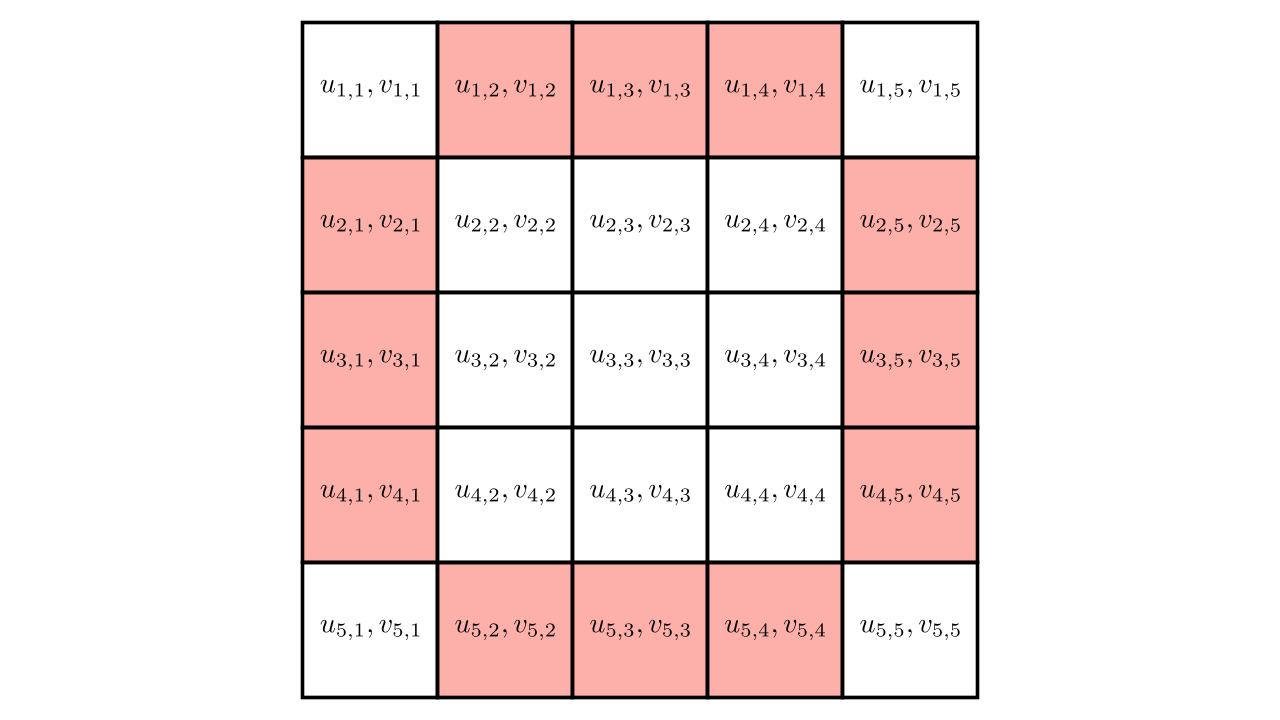

In [89]:
%%manim -qm GridPicture
#Manims positioning uses a 3D coordinate system. Uses numpy arrays. np.array([2,1,0]) is a position on the window.
#Manims default window is 8 Munits(manim units) tall and 14 + 2/9 = 14.22222.. Munits in width.
#The origo is at the center of the window

class GridPicture(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        # It seems like all the variables from the other codes are global so I can use U and other variables in this function without having to import them.
        graph_sl = 7.5 #The graphs side length
        gridRows = 5
        gridColumns = 5
        square_sl = graph_sl/gridRows #The side length of each cell
        squares = VGroup() #Makes an empty "array" that I can put my square manim objects in.
        text = VGroup() #Makes an empty "array" that I can put my square manim objects in.
        fillColor = WHITE
        
       
        
        
        for i in range(0,gridRows): #Goes through each row
            for j in range(0,gridColumns): # Goes through each column
                if ((i==0 and not (j==0 or j==gridColumns-1)) or 
                                (i==gridRows-1 and not (j==0 or j==gridColumns-1)) or 
                                (j==0 and not (i==0 or i==gridRows-1)) or 
                                (j==gridColumns-1 and not (i==0 or i==gridRows-1))):
                    fillColor = RED
                else:
                    fillColor = WHITE
                squares.add(Square(side_length = square_sl, color = BLACK, fill_color = fillColor, fill_opacity = 0.5).move_to([-graph_sl/2+square_sl*(0.5+i),graph_sl/2-square_sl*(0.5+j),0]))
                rowNumber = str(i+1)
                columnNumber = str(j+1)
                text.add(MathTex("u_{"+rowNumber+","+columnNumber+"},v_{"+rowNumber+","+columnNumber+"}", color = BLACK, font_size = 30).move_to([-graph_sl/2+square_sl*(0.5+j),graph_sl/2-square_sl*(0.5+i),0]))
                #self.add(squares[gridRows*i+j])
        
        self.add(squares,text)

B-matrix if the inner grid is a 3x3 and we use one morphogen as input and all neighbouring edge cells in the input. (Not the corners because they don't neigbour the inner grid)

$$
Bu = D_x\begin{bmatrix}
        1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
    \end{bmatrix}
    \begin{bmatrix}
        u_{1,2} \\ u_{1,3} \\ u_{1,4} \\ u_{2,1} \\ u_{2,5} \\ u_{3,1} \\ u_{3,5} \\ u_{4,1} \\ u_{4,5} \\ u_{5,2} \\ u_{5,3} \\ u_{5,4}
    \end{bmatrix}
$$

In [5]:
a = 1; b = 2; c = 3; d = 4; D_x = 1; D_y = 2
print("a=", a,", b=", b,", c=", c,", d=", d,", D_x=", D_x,", D_y=", D_y,)
morphogens = 2

#rows and columns that we are looking at. The whole cell grid is rows+2 and columns+2 because we are ignoring the edges.
cellRows = 20 
cellColumns = 20
print("Morphogens:",morphogens)
print()
print("Inner grid of cells is", cellRows,"x", cellColumns)

#How many rows and columns matrix A has:
ARows = cellRows*cellColumns*morphogens
AColumns = cellRows*cellColumns*morphogens
print("size of A: ", ARows,"x",AColumns)
A = np.zeros([ARows,AColumns]) #Creating an empty A-matrix

for m1 in range(0,morphogens): #Number of morphogens     
        for cr1 in range(0,cellRows):
            for cc1 in range(0,cellColumns):
                for m2 in range(0,morphogens):
                    for cr2 in range(0,cellRows):
                        for cc2 in range(0,cellColumns):
                            rA = m1*cellRows*cellColumns + cr1*cellColumns + cc1 
                            cA = m2*cellRows*cellColumns + cr2*cellColumns + cc2 # realized now that I could have written cA +=1 instead
                            if (m1==m2):
                                if (cc1==cc2 and cr1==cr2):
                                    A[rA,cA] = (-4*D_x + a)*((m1+1)%2) + (-4*D_y + b)*(m1)
                                elif ((cc1-1==cc2 and cr1==cr2) or 
                                      (cc1+1==cc2 and cr1==cr2) or 
                                      (cr1-1==cr2 and cc1==cc2) or 
                                      (cr1+1==cr2 and cc1==cc2)):
                                    A[rA,cA] = D_x*((m1+1)%2) + D_y*(m1)
                            else:
                                if (cc1==cc2 and cr1==cr2):
                                    A[rA,cA] = (b)*((m1+1)%2) + (d)*(m1)
#print(A)
print()

morphogenInput = 1   #How many morphogens we use as input. (Right now we use the concentration of all neighbouring cells as input.)
print("We use", morphogenInput, "morphogen(s) as input")

#How may rows and columns matrix B has:
BRows = ARows
BColumns = (2*cellRows + 2*cellColumns)*morphogenInput
print("size of B: ", BRows,"x",BColumns)
B = np.zeros([BRows, BColumns]) #Creating an empty B matrix

rB = 0 #row index in the B matrix
for m1 in range(0,morphogenInput): #Number of morphogens we use as input
        for cr1 in range(0,cellRows):
            for cc1 in range(0,cellColumns):
                cB = 0 #columns index in the B matrix
                for m2 in range(0,morphogenInput):
                    for cr2 in range(-1,cellRows+1):
                        for cc2 in range(-1,cellColumns+1): 
                            if ((cr2==-1 and not (cc2==-1 or cc2==cellColumns)) or 
                                (cr2==cellRows and not (cc2==-1 or cc2==cellColumns)) or 
                                (cc2==-1 and not (cr2==-1 or cr2==cellRows)) or 
                                (cc2==cellColumns and not (cr2==-1 or cr2==cellRows))):
                                if ((cc1-1==cc2 and cr1==cr2) or 
                                    (cc1+1==cc2 and cr1==cr2) or 
                                    (cr1-1==cr2 and cc1==cc2) or 
                                    (cr1+1==cr2 and cc1==cc2)):
                                    B[rB,cB] = D_x*((m1+1)%2) + D_y*(m1)
                                cB +=1 #Move one column in the B matrix
                rB +=1 #Move one row in the B matrix
#print(B)

a= 1 , b= 2 , c= 3 , d= 4 , D_x= 1 , D_y= 2
Morphogens: 2

Inner grid of cells is 20 x 20
size of A:  800 x 800

We use 1 morphogen(s) as input
size of B:  800 x 80


### Calculating the reachability matrix gamma and its rank:

#### Second fastest way:

In [9]:
tic = process_time()
gRows = BRows
gColumns = BRows*BColumns
gamma = np.zeros([gRows, gColumns])
#rankB = np.linalg.matrix_rank(B, tol=10**(-16))
#for c in range(0,2):
for c in range(0,BRows):
    gamma[:,c*BColumns:(c+1)*BColumns] = np.matmul(np.linalg.matrix_power(A, c),B)
    rankGamma = np.linalg.matrix_rank(gamma, tol=10**(-16))
    if (rankGamma == gRows):
        print("FULL RANK at c =",c)
        break
print("rank of gamma:", rankGamma)
print("size of gamma: ",gRows,"x",gColumns)
toc = process_time()
print("processing time:",toc-tic, "seconds")

FULL RANK at c = 10
rank of gamma: 800
size of gamma:  800 x 64000
processing time: 151.484375 seconds


#### Slowest way

In [6]:
tic = process_time()
gRows = BRows
gColumns = BRows*BColumns
gamma = np.zeros([gRows, gColumns])
#rankB = np.linalg.matrix_rank(B, tol=10**(-16))
#for c in range(0,2):
for c in range(0,BRows):
    gamma[:,c*BColumns:(c+1)*BColumns] = np.matmul(np.linalg.matrix_power(A, c),B)
    #rankGamma = np.linalg.matrix_rank(gamma, tol=10**(-16))
    #if (rankGamma == gRows):
    #    print("FULL RANK at c =",c)
    #    break
rankGamma = np.linalg.matrix_rank(gamma, tol=10**(-16))
print("rank of gamma:", rankGamma)
print("size of gamma: ",gRows,"x",gColumns)
toc = process_time()
print("processing time:",toc-tic, "seconds")

C:\Users\Admin\anaconda3\lib\site-packages\numpy\linalg\linalg.py:664: RuntimeWarning: overflow encountered in matmul
  result = z if result is None else fmatmul(result, z)
C:\Users\Admin\AppData\Local\Temp/ipykernel_16136/170583601.py:8: RuntimeWarning: invalid value encountered in matmul
  gamma[:,c*BColumns:(c+1)*BColumns] = np.matmul(np.linalg.matrix_power(A, c),B)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\linalg\linalg.py:661: RuntimeWarning: overflow encountered in matmul
  z = a if z is None else fmatmul(z, z)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\linalg\linalg.py:664: RuntimeWarning: invalid value encountered in matmul
  result = z if result is None else fmatmul(result, z)


rank of gamma: 0
size of gamma:  800 x 64000
processing time: 822.203125 seconds


#### Fastest way

In [8]:
tic = process_time()
gRows = BRows
gColumns = BRows*BColumns
gamma = np.zeros([gRows, gColumns])
rankB = np.linalg.matrix_rank(B, tol=10**(-16))
print("räknar rang när (c+1) >= ", gRows/rankB)
#for c in range(0,2):
for c in range(0,BRows):
    gamma[:,c*BColumns:(c+1)*BColumns] = np.matmul(np.linalg.matrix_power(A, c),B)
    if (rankB*(c+1) >= gRows):
        rankGamma = np.linalg.matrix_rank(gamma, tol=10**(-16))
        if (rankGamma == gRows):
            print("FULL RANK at c =",c)
            break
print("rank of gamma:", rankGamma)
print("size of gamma: ",gRows,"x",gColumns)
toc = process_time()
print("processing time:",toc-tic, "seconds")

räknar rang när (c+1) >=  10.526315789473685
FULL RANK at c = 10
rank of gamma: 800
size of gamma:  800 x 64000
processing time: 18.734375 seconds


In [54]:
number = 10011
x = str(number)
print(x)

10011


In [56]:
number = 10011
array = [int(x) for x in str(number)]
print(array)

[1, 0, 0, 1, 1]


Yuexins B-matris

In [34]:
BRows = 18
BColumns = 8
B = np.zeros([18,8])
for r in range(0,9):
    if (r<4):
        B[r,r] = 1
    elif (r==4):
        pass
    else:
        B[r,r-1] = 1
print(B)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [40]:
rankB = np.linalg.matrix_rank(B, tol=10**(-16))
print("rank of B:", rankB)
print("size of B: ",BRows,"x",BColumns)

rank of B: 16
size of B:  50 x 20


In [ ]:
number = 2^4
binaryNum = bin(number)
print("number")

In [3]:
x=2**(8)
print(x)

256


### Nästa steg i controllability theory
#### Testa större grids (upp till 20x20 sade Yuexin)
1. Vi ska kolla ranken på gamma för större grid av celler. Jag funderar då om jag ska försöka implementera en check av ranken av gamma innan den är klar. Alltså att jag t.e.x kontrollerar gamma när jag bara har gjort gamma=[B, AB] istället för att räkna ut hela gamma=[B,AB...A^(n-1)B] eftersom om [B, AB] har full rang så har även hela gamma full rang. Jag skulle kunna kontrollera ranken på gamma varje gång jag går igenom for loopen där jag skapar gamma.
1. Komma på ett sätt att loopa igenom alla olika sätt vi kan välja inputs på. Vi kan beskriva val av inputs som ett binärt tal med 9 stycken siffror, 9 för att vi har nio inputs-celler och vi väljer just nu att bara använda morphogen u som input. Vi skulle då kunna gå igenom alla olika variationer av inputs genom att gå igenom alla tal mellan 000000000 och 111111111.
2. För varje loop av inputs vill vi skapa en tillhörande B-matris.
3. Skapa matrisen gamma och räkna ut dens rank. Eller så gör vi bara början av gamma, Yuexin gick igenom att om t.e.x [B, AB] har full rank så vet vi att hela gamma=[B,AB...A^(n-1)B] också har full rank.